In [6]:
from cv2 import threshold
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import csv

#with open("/home/kathy/NPHdata.csv") as file:
    #values = np.loadtxt(file, delimiter=",")
    #array = list(file)

df = pd.read_csv("/home/kathy/NPHdata.csv")
df.dropna(inplace=True, subset=['File Name'])
df = df[:-1]
df

thresholds = list(np.array(list(range(4079, 169960, 16000))))

In [7]:
from re import A
import numpy as np

res = {}

list_tp, list_fn, list_fp, list_tn = [], [], [], []

# tp = 0; fp = 0; fn = 0; tn = 0

for threshold in thresholds:
    # print(thresholds)
    list_tp.append(0)
    list_fn.append(0)
    list_fp.append(0)
    list_tn.append(0)
    for index, instance in df.iterrows():
        actual = instance["Has NPH?"]
        prediction = instance["Manual Threshold - Voxel Count"]
        pred = True if instance['Voxel Count'] > threshold else False
        res.setdefault(threshold, []).append(pred)

        if actual == "TRUE" and pred == True:
            # tp += 1
            list_tp[-1] += 1
            #array_tp[-1] += 1
        elif actual == "FALSE" and pred == False:
            # tn += 1
            list_tn[-1] += 1
            #array_tn[-1] += 1
        elif actual == "TRUE" and pred == False:
            # fn += 1
            list_fn[-1] += 1
            # array_fn[-1] += 1
            #list_fn.append()
        elif actual == "FALSE" and pred  == True:
            # fp += 1
            #array_tn[-1] += 1
            list_fp[-1] += 1

#print(list_fp, list_fn, list_tn, list_tp)       

# tpr = tp / (tp + fn)
# fpr = fp / (tn + fp)

# accuracy = (tp + tn) / (tp + tn + fn + fp)

# print(tpr, fpr, accuracy)
        
        # if (pred == True and actual == "TRUE") or (pred == False and actual == "FALSE"):
            # res.setdefault(threshold, []).append(True)
        # else:
            # res.setdefault(threshold, []).append(False)
    # print(actual, prediction)



In [9]:
list_tpr = []
list_fpr = []
for i in range(len(list_fp)):
    list_tpr.append(list_tp[i]/(list_tp[i]+list_fn[i]))
    list_fpr.append(list_fp[i]/(list_tn[i]+list_fp[i]))

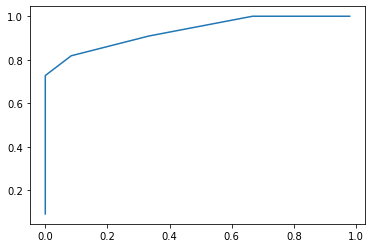

In [12]:
import matplotlib.pyplot as plt
plt.plot(list_fpr, list_tpr)